<a href="https://colab.research.google.com/github/a-forty-two/zee_9_may_22/blob/main/cv_image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

lovedeathrobots.jpeg  sample_data


In [2]:
rawdatatext = open('lovedeathrobots.jpeg', 'rt').read()

UnicodeDecodeError: ignored

In [3]:
rawdatabinary = open('lovedeathrobots.jpeg', 'rb').read()


In [ ]:
# all files-> encoding -> otherwise raw data can be manipulated by any tool
# encoding-> helps with better/compressed representation of data
# encode-> optimized the bytes behind the scene 
# a tool is then programmed to decode the file encoding
# Word-> .docx -> word knows how to decode .doc and .docx encoding!
# Photoshop -> .psd-> PS knows how to decode .psd encoding!

In [ ]:
# UTF-8 > unified true font where 1 char = 8 bits (C/C++ style characters char)
# UTF-16 -> UTF where 1 char = 16 bits = 2 bytes (C/C++ style wide character wchar)
# UTF-32, XMLNS (html)
# .mkv, .avi -> not supported in WMP, while supported in VLC or MKV player! 

In [ ]:
# 12 13 13 14 14 14 2 2 2 6 6 6 55 55 55 55 55 22 12 (unencoded)
# run length encoding (data compression)
# duplication-> count 
# 12 1 13 2 14 3 2 3 6 3 55 4 22 1 12 1 (encoded)
# this helped reduce the size of data 
# in order to process-> i need a tool or program that could read alternate 
# chars, and understand that it means LENGTH!

# big data-> BigTable! 
# dictionary encoding & run length
# id name hobby
# 1. Pikachu Eating
# 2. Shaktiman Flying
# 3. Doremon Flying
# 4. Pikachu Flying 

# each column becomes diff file!
# pikachu: {1,4}, Shaktiman: {2}, Doremon: {3}
# eating: {1}, Flying: {2,3,4}

# editing-> NIGHTMARE!

# Auto-Indexing- Shuffling! 



In [4]:
rawdatabinary[:10]
# all hexademical, incomprehensive 

b'RIFF>\xa0\x01\x00WE'

In [ ]:
# images-> openCV -> all decoders and manipulators for image processing 

In [5]:
import cv2 
myimg = cv2.imread('lovedeathrobots.jpeg')
myimg[:10]
# Use TF not opencv to read images in prod!
# this CV usage is for demo only!

# BGR -> in python 
# RGB-> real life-> stack-> r is at bottom, blue in middle, red on top

array([[[ 25,  27,  36],
        [ 25,  27,  36],
        [ 25,  27,  36],
        ...,
        [182, 173, 159],
        [189, 180, 166],
        [194, 185, 170]],

       [[ 25,  27,  36],
        [ 25,  27,  36],
        [ 25,  27,  36],
        ...,
        [143, 138, 127],
        [148, 142, 132],
        [151, 146, 135]],

       [[ 25,  27,  36],
        [ 25,  27,  36],
        [ 25,  27,  36],
        ...,
        [ 69,  70,  67],
        [ 70,  71,  68],
        [ 71,  72,  69]],

       ...,

       [[ 18,  22,  31],
        [ 21,  25,  33],
        [ 23,  27,  36],
        ...,
        [130, 122, 112],
        [134, 126, 115],
        [131, 123, 113]],

       [[ 24,  28,  37],
        [ 23,  27,  36],
        [ 24,  28,  37],
        ...,
        [ 95,  92,  88],
        [ 96,  93,  89],
        [ 96,  93,  89]],

       [[ 24,  28,  37],
        [ 24,  28,  37],
        [ 24,  28,  37],
        ...,
        [ 48,  50,  50],
        [ 48,  50,  50],
        [ 48,  50,  50]]

(600, 1200, 3)


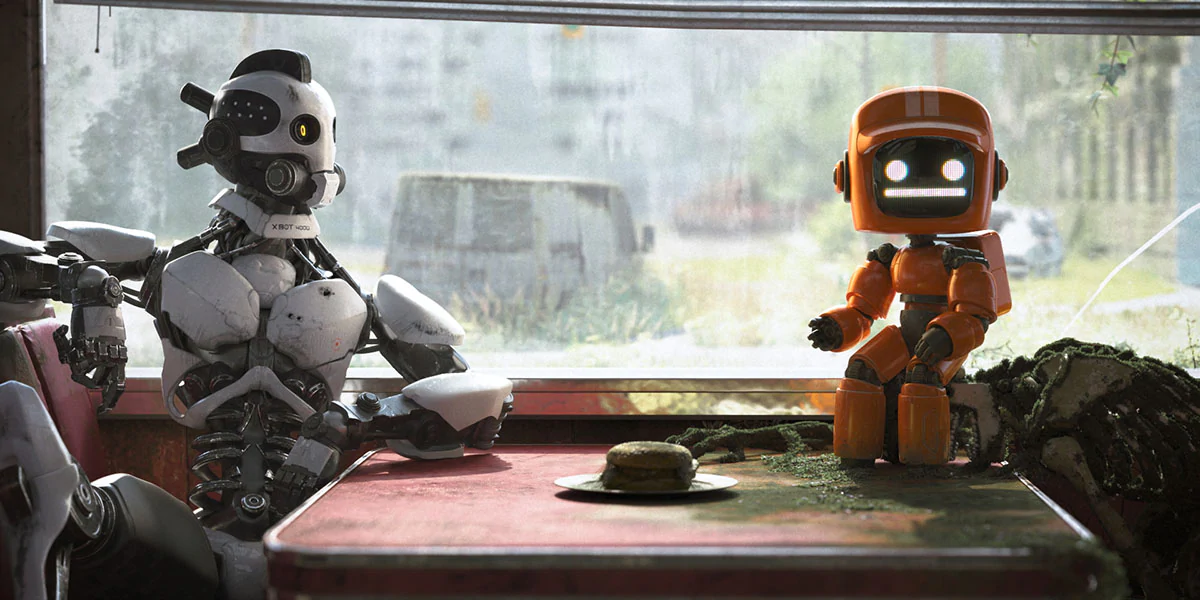

In [6]:
from google.colab.patches import cv2_imshow
print(myimg.shape)
cv2_imshow(myimg)
# 640 rows
# each row contains 2000 pixels
# each pixel contains 3 values- B, G and R

(300, 600, 3)


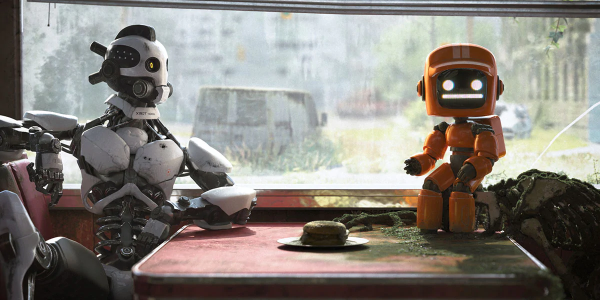

In [7]:
# always mantain aspect ratios else the height and width will be disturbed/ img can be distorted
imgh, imgw, pxcount = myimg.shape 
reduction_ratio = 0.5
newh = int(imgh * reduction_ratio)
neww = int(imgw * reduction_ratio)
smallimg = cv2.resize(myimg, (neww, newh))
print(smallimg.shape)
cv2_imshow(smallimg)

# with pooling - Lossy Compression
# without pooling - can be either lossy or lossly (metadata dependency)

In [ ]:
# VECTORS-> scalar values with direction
# scalar-> 3
# vector-> [1 2 3 4 5 6 7]
# if you multiple or divide a vector with a scalar -> DIRECTION DOES NOT CHANGE!
# such vectors following this rule-> EIGENVECTORS 
# the scalar value representing this vector-> eigenvector 
# MATRICES-> matrix -> image vector, a set of vectors traveling together 
# Eigner vector-> scalar value * MATRIX => result's DIRECTIONS SHOULD NOT CHANGE!
# some examples of non eigen distortions-> sin theta, cos theta 
# ANGULAR values, RADIAN values change the direction of the vector => DISTORTION!

# image augmentation-> NOT an Eigen transform!
# scaling (normalization/minmax)-> an Eigen transformation!

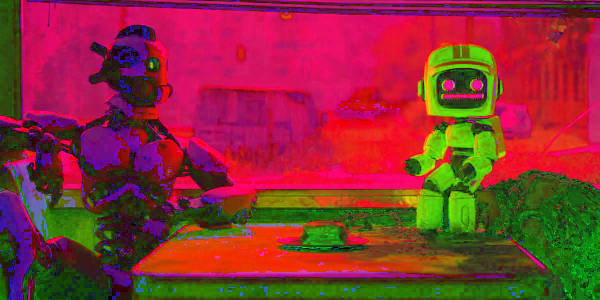

In [8]:
img2 = cv2.cvtColor(smallimg, cv2.COLOR_BGR2HSV)
cv2_imshow(img2)

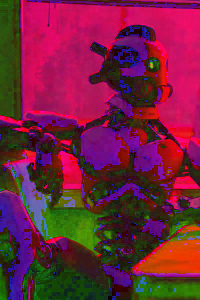

In [13]:
# Cropping, Windows for pooling-> both are same methods with diff sizes!
h,w,p = img2.shape
w_extractionbegin = int(w/3)
img3 = img2[:, :w_extractionbegin ]
cv2_imshow(img3)

In [16]:
h,w,p = img3.shape
robot_h_till = int(h*0.60)  
img_r = img3[:robot_h_till,: ]
img_c = img3[:, robot_h_till:]

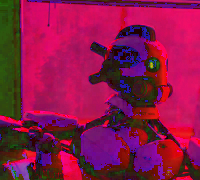

In [18]:
cv2_imshow(img_r)
# Extract a frame-> and then we try Image classification!
# creating windows, performing image classification-> OBJECT detection!

In [19]:
cv2_imshow(img_c)